# <Font color = 'brown'><center>Multivariate Logistic Regression - Model Building

## <font color='blue'>Introduction
    
    
Just like when we are building a model using linear regression, one independent variable might not be enough to capture all the uncertainties of the target variable in logistic regression as well. So in order to make good and accurate predictions, you need multiple variables.
    
    
Before starting with multivariate logistic regression, the first question that arises is, “Do you need any extensions while moving from univariate to multivariate logistic regression?” Recall the equation used in the case of univariate logistic regression was:
    
$$P = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}X)}}$$
    

The above equation has only one feature variable $X$, for which the coefficient is $\beta_1$.Now, if we have multiple features, say n, we can simply extend this equation with ‘n’ feature variables and ‘n’ corresponding coefficients such that the equation now becomes:
    

$$P = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}X_1+\beta_2 X_2+\beta_3 X_3+...+\beta_n X_n)}}$$
    

this extension is similar to what we did while moving from simple to multiple linear regression.

### <font color='blue'> In this Session
    
    
We will learn how to:
    
- Build a multivariate logistic regression model in Python
- Conduct feature selection for logistic regression using:
    - Automated methods: RFE -Recursive Feature Elimination
    - Manual methods: VIF and p-value check
    

We will use the ‘Telecom Churn’ dataset in this session to build a model using multivariate logistic regression. This will involve all the familiar steps such as:
- Data cleaning and preparation
- Preprocessing steps
- Test-train split
- Feature scaling
- Model Building using RFE, p-values and VIFs
    
    
Apart from the familiar old steps, we’ll also be introduced to something known as a confusion matrix and we’ll also learn how the accuracy is measured for a logistic regression model.
    
---

## <font color='blue'>Multivariate Logistic Regression - Telecom Churn Example
    
    
Let's now look at the process of building a logistic regression model in Python.
    
    
We will be looking at the **telecom churn prediction** example. You will use 21 variables related to customer behaviour (such as the monthly bill, internet usage etc.) to predict whether a particular customer will switch to another telecom provider or not (i.e. churn or not).

### <font color='blue'>Problem Statment
    
We have a telecom firm which has collected data of all its customers. The main types of attributes are:
    
- Demographics (age, gender etc.)
    
    
- Services availed (internet packs purchased, special offers taken etc.)
    
    
- Expenses (amount of recharge done per month etc.)
    
    
    
Based on all this past information, we want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.
    
    
So, here’s what the data frame `churn_data` looks like:
    
    
    
<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/0982f22c-68b4-4cca-81e3-4a9d6b007d07/Churn.PNG" width='800'>
</div>
    
<center>Data Frame 1: churn_data

Also, here’s the data frame `customer_data`:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/1f8a3054-67a8-4862-9f22-201a95c8be79/customer+data.PNG" width='350'>
</div>
<center>Data Frame 2: customer_data

Lastly, here’s the data frame `internet_data`:


<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/7b67be47-8ecb-4613-8458-b87ddcd61a5f/Internet+Data.PNG" width='800'>
</div>
<center>Data Frame 3: internet_data

Now, as we can clearly see, the first 5 customer IDs are exactly the same for each of these data frames. Hence, using the column customer ID, you can collate or merge the data into a single data frame.

---

## <font color = 'blue'>Data Cleaning and Preparation - I
    
Before we jump into the actual model building, we first need to clean and prepare our data. As we might have seen in the last segment, all the useful information is present in three dataframes with ‘Customer ID’ being the common column. So as the first step, we need to merge these three data files so that we have all the useful data combined into a single master dataframe.

## <font color='blue'> Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### <font color='blue'>Step 1: Importing and Merging Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and Numpy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv(r"C:\My files\Upgrad Data science\1. Main Course\5. Machine learning 1\3. Logistic Regression\2. Multivariate Logistic Regression - Model Building\1. Data\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv(r"C:\My files\Upgrad Data science\1. Main Course\5. Machine learning 1\3. Logistic Regression\2. Multivariate Logistic Regression - Model Building\1. Data\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv(r"C:\My files\Upgrad Data science\1. Main Course\5. Machine learning 1\3. Logistic Regression\2. Multivariate Logistic Regression - Model Building\1. Data\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### <font color='blue'>Combining all data files into one consolidated dataframe

In [6]:
# Setting the columns and row for visibility
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows",500)

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data,customer_data,how='inner',on="customerID")

In [8]:
# Final data frame with all predictor variables
telecom = pd.merge(df_1,internet_data,how="inner",on="customerID")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


### <font color='blue'>Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### <font color='blue'>Step 3: Data Preparation

#### <font color='blue'>Converting some binary variables (Yes/No) to 0/1

In [14]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Applying the map function to the housing list
telecom[varlist] = telecom[varlist].apply(lambda x: x.map({'Yes':1,"No":0}))

In [15]:
# Alternate method
# # List of variables to map

# varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# # Defining the map function
# def binary_map(x):
#     return x.map({'Yes': 1, "No": 0})

# # Applying the function to the housing list
# telecom[varlist] = telecom[varlist].apply(binary_map)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


#### <font color='blue'>For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [17]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']],drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom,dummy1],axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [19]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [20]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


#### <font color='blue'>Dropping the repeated variables

In [21]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [22]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

So the process of dummy variable creation was quite familiar, except this time, we manually dropped one of the columns for many dummy variables. For example, for the column ‘MultipleLines’, we dropped the level ‘MultipleLines_No phone service’ manually instead of simply using ‘drop_first = True’ which would’ve dropped the first level present in the ‘MultipleLines’ column. The reason we did this is that if you check the variables ‘MultipleLines’ using the following command, we can see that it has the following three levels:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/54240904-f323-4a0c-ae09-7c0b43f46d6b/1.PNG" width='400'>
</div>
<center>Dummy Variable Levels

Now, out of these levels, it is best that we drop ‘No phone service’ since it isn’t of any use because it is anyway being indicated by the variable ‘PhoneService’ already present in the dataframe.

To simply put it, the variable **`PhoneService`** already tells you whether the phone services are availed or not by a particular customer. In fact, if you check the value counts of the variable `PhoneService`, following is the output that you get:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/f389134c-6c39-4f2c-b6c4-b2eaca344407/PhoneService.PNG" width='400'>
</div>
<center>Levels of the Variable 'PhoneService'

We can see that the level 'No' appears **682 times** which is **exactly equal to** the count of the level `No phone service` in `MultipleLines`.

We can see that the dummy variable for this level, i.e. `MultipleLines_No phone service` is clearly redundant since it doesn't contain any extra information and hence, to drop it is the best option at this point. We can verify it similarly for all the other categorical variables for which one of the levels was manually dropped.

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Level counts**<br><br>
In the text above, you saw that for the variable `MultipleLines` the value counts of the levels `Yes`, `No`, and `No phone service` are 3390, 2971, and 682 respectively. When you run the same command for the column `OnlineBackup`, what will the value count for its level `No internet service` turn out to be?
    
    
- 3088
    
    
- 2429
    
    
- 2019
    
    
- 1526
    
    
#### <font color='blue'>Answer:
**1526**

In [13]:
telecom.OnlineBackup.astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

#### <font color='blue'>Question_2:
**Levels of Dummy Variables**<br><br>
If you check the value counts of the levels ‘OnlineBackup’, ‘OnlineSecurity’, ‘DeviceProtection’, and all the others for which one of the levels was dropped manually, you can see that the count of the level ‘No internet service’ is the same for all, i.e. 1526. Can you explain briefly why this has happened?
  
    
    
#### <font color='blue'>Answer:
This happens because the level ‘No internet service’ just tells you whether a user has internet service or not. Now because the number of users not having an internet service is the same, the count of this level in all of these variables will be the same. You can also check the value counts of the variable ‘InternetService’ and you’ll see that the output you’ll get is:
    
    
| | |
|--|--|
|Fiber Optic|3096|
|DSL|2421|
|No|1526|

    
Coincidence? No! 
This information is already contained in the variable ‘InternetService’ and hence, the count will be the same in all the variables with the level ‘No internet service’. This is actually also the reason we chose to drop this particular level.
    
---

## <font color='blue'>Data Cleaning and Preparation - II
We’ve merged your dataframes and handled the categorical variables present in them. But you still need to check the data for any outliers or missing values and treat them accordingly. 

#### <font color='blue'>Checking for Outliers

In [24]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [25]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### <font color='blue'>Checking for Missing Values and Inputing Them

In [26]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [27]:
# Checking the percentage of missing values
round((telecom.isnull().sum()/len(telecom))*100,2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [28]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [29]:
# Checking percentage of missing values after removing the missing values
round((telecom.isnull().sum()/len(telecom))*100,2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### <font color='blue'>Step 4: Test-Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [32]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### <font color='blue'>Step 5: Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [36]:
# checking the describe function
X_train.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,4.922000e+03,4922.000000,4922.000000,4.922000e+03,4.922000e+03,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.00000,4922.000000,4922.000000,4922.00000
mean,1.229793e-16,0.903901,0.591223,-2.053980e-16,1.221426e-16,0.161926,0.480699,0.297237,0.214953,0.239130,0.218813,0.330557,0.232020,0.503657,0.439862,0.216985,0.482731,0.421170,0.497765,0.285250,0.431735,0.351280,0.440471,0.342544,0.485575,0.297440,0.40065,0.382365,0.395165,0.38785
std,1.000102e+00,0.294757,0.491658,1.000102e+00,1.000102e+00,0.368420,0.499678,0.457088,0.410832,0.426596,0.413484,0.470461,0.422164,0.500037,0.496421,0.412234,0.499752,0.493797,0.500046,0.451579,0.495368,0.477419,0.496494,0.474609,0.499843,0.457178,0.49008,0.486014,0.488936,0.48731
min,-1.286319e+00,0.000000,0.000000,-1.548555e+00,-1.002408e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,-9.598159e-01,1.000000,0.000000,-9.665930e-01,-8.344722e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,-1.435582e-01,1.000000,1.000000,1.823658e-01,-3.877341e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,9.583897e-01,1.000000,1.000000,8.341630e-01,6.589888e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
max,1.611396e+00,1.000000,1.000000,1.793569e+00,2.818847e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


In [37]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn 

26.578498293515356

We have almost 27% churn rate

Recall that, for continuous variables, Here scaled the variables to standardise the three continuous variables — `tenure, monthly charges and total charges`. Recall that scaling basically reduces the values in a column to within a certain range — in this case, we have converted the values to the Z-scores.


For example, let’s say that, for a particular customer, tenure = 72. After standardising, the value of scaled tenure becomes:

$\frac{72-32.4}{24.6} = 1.61$

because for the variable tenure, mean $(\mu) = 32.4$ and standard deviation $(\sigma)=24.6$

The variables had these ranges before standardisation:
- Tenure = 1 to 72
- Monthly charges = 18.25 to 118.80
- Total charges = 18.8 to 8685

After standardisation, the ranges of the variables changed to:
- Tenure = -1.28 to +1.61
- Monthly charges = -1.55 to +1.79
- Total charges = -0.99 to 2.83

Clearly, none of the variables will have a disproportionate effect on the model’s results now.


**Churn Rate and Class Imbalance**<br>
Another thing to note here was the Churn Rate. We saw that the data has almost 27% churn rate. Checking the churn rate is important since we usually want our data to have a balance between the 0s and 1s (in this case churn and not-churn). 

 

The reason for having a balance is simple. Let’s do a simple thought experiment - if you had a data with, say, 95% not-churn (0) and just 5% churn (1), then even if you predict everything as 0, you would still get a model which is 95% accurate (though it is, of course, a bad model). This problem is called class-imbalance and you'll learn to solve such cases later.


Fortunately, in this case, we have about 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Standardising Variables**<br><br>
In a dataset with mean 50 and standard deviation 12, what will be the value of a variable with an initial value of 20 after you standardise it?
    
    
- 1.9
    
    
- -1.9
    
    
- 2.5
    
    
- -2.5
    
    
#### <font color='blue'>Answer:
**-2.5**
    
    
The formula for standardising a value in a dataset is given by:

$\frac{(X-\mu)}{\sigma}$
    
Hence, you get:

$\frac{(20-50)}{12} = -2.5$

#### <font color='blue'>Question_2:
**Standardising the train and test sets**<br><br>
As Rahim mentioned in the lecture, you use 'fit_transform' on the train set but just 'transform' on the test set. Recall you had learnt this in linear regression as well. Why do you think this is done?
    
    
#### <font color='blue'>Answer:
The `fit_transform`  command first fits the data to have a mean of 0 and a standard deviation of 1, i.e. it scales all the variables using:
    
$$ X_{scaled} = \frac{(X-\mu)}{\sigma}$$
    

Now, once this is done, all the variables are transformed using this formula. Now, when you go ahead to the test set, you want the variables to not learn anything new. You want to use the old centralisation that you had when you used fit on the train dataset. And this is why you don't apply `fit` on the test data, just the `transform`.
    
You can also refer to [this](https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models) StackOverflow answer. 
    
---

## <font color='blue'>Building your First Model

### <font color='blue'>Step 6: Looking at Correlations

Let’s now proceed to model building. Recall that the first step in model building is to check the correlations between features to get an idea about how the different independent variables are correlated. In general, the process of feature selection is almost exactly analogous to linear regression.

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

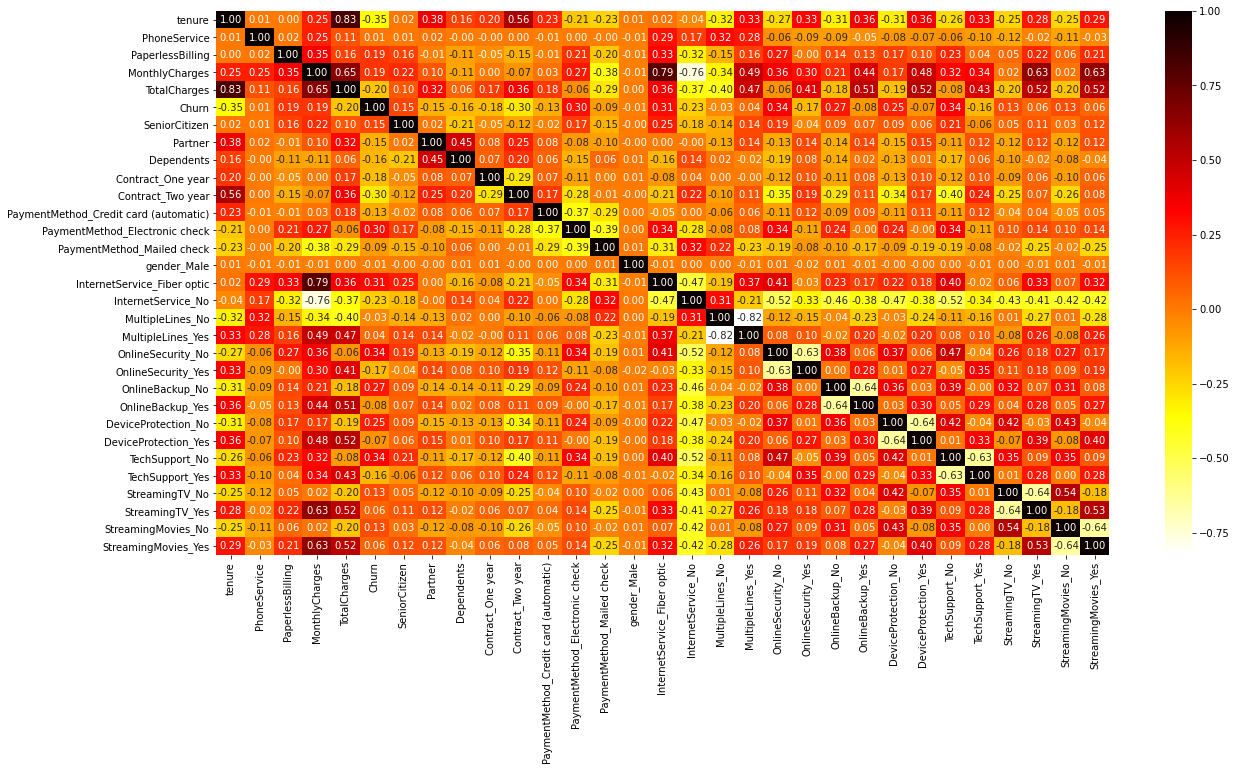

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True,fmt=".2f",cmap="hot_r");

#### <font color='blue'>Dropping highly correlated dummy variables

In [40]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### <font color='blue'>Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

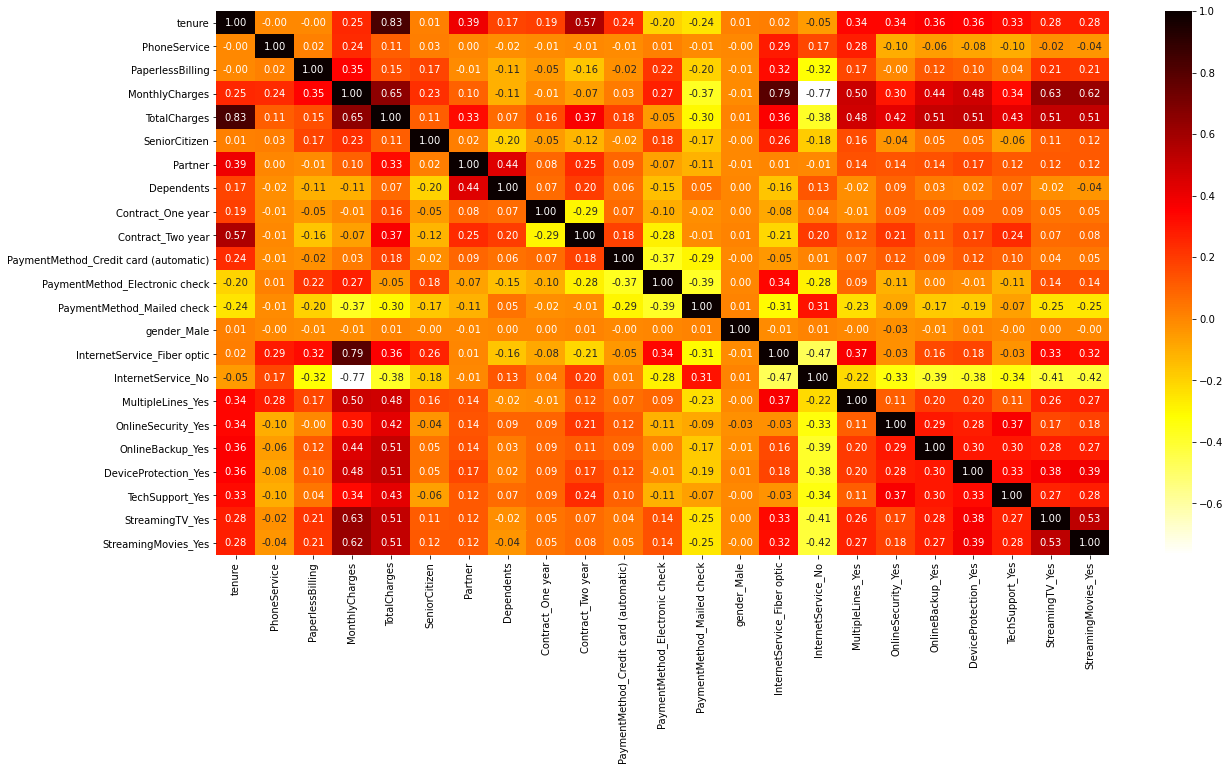

In [41]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True,fmt=".2f",cmap="hot_r");

Looking at the correlations certainly did help, as we identified a lot of features beforehand which wouldn’t have been useful for model building. Recall that the following features were dropped after looking at the correlations from the heatmap:

- MultipleLines_No
- OnlineSecurity_No
- OnlineBackup_No
- DeviceProtection_No
- TechSupport_No
- StreamingTV_No
- StreamingMovies_No


If we look at the correlations between these dummy variables with their complimentary dummy variables, i.e. **`MultipleLines_No`** with **`MultipleLines_Yes`** or **`OnlineSecurity_No`** with **`OnlineSecurity_Yes`**, we’ll find out they’re highly correlated. Have a look at the heat map below:<br><br>

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/1e9ee1cb-cb83-4afc-aa60-4bf9854132d0/heatmap-edited.png" width='800'>
</div>
<br>
<center>Heatmap for the Complimentary Dummy Variables

If we check the highlighted portion, we’ll see that there are high correlations among the pairs of dummy variables which were created for the same column. For example, **`StreamingTV_No`** has a correlation of **`-0.64`** with **`StreamingTV_Yes`**. So it is better than we drop one of these variables from each pair as they won’t add much value to the model. The choice of which of these pair of variables you desire to drop is completely up to you; we’ve chosen to drop all the `Nos` because the `Yeses` are generally more interpretable and easy-to-work-with variables.

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Correlation Table**<br><br>
Which of the following command can be used to view the correlation table for the dataframe telecom?
    
    
- telecom.corr()
    
    
- sns.heatmap(telecom.corr(), annot = True)
    
    
- sns.pairplot(telecom)
    
    
- All of the above
    
    
#### <font color='blue'>Answer:
**telecom.corr()**
    
    
telecom.corr() will give you the correlation table for the dataframe telecom.

#### <font color='blue'>Question_2:
**Checking Correlations**<br><br>

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/1e9ee1cb-cb83-4afc-aa60-4bf9854132d0/heatmap-edited.png" width='800'>
</div>

Take a look at the heatmap provided above. Which of the variables have the highest correlation between them?
    
    
- StreamingTV_Yes and StreamingMovies_Yes
    
    
- StreamingTV_No and StreamingMovies_No
    
    
- MultipleLines_No and MultipleLines_Yes
    
    
- OnlineBackup_No and OnlineBackup_Yes
    
    
#### <font color='blue'>Answer:
**MultipleLines_No and MultipleLines_Yes**
    
    
The following are the correlation values between the four pair of variables given in the options:

- 0.53
- 0.54
- -0.82
- -0.64
    
As you can clearly see, the third pair, i.e. MultipleLines_No and MultipleLines_yes is the most correlated with a value of -0.82.

Now that you have completed all the pre-processing steps, inspected the correlation values and have eliminated a few variables, it’s time to build our first model. 

---

### <font color='blue'>Step 7: Model Building

#### <font color='blue'>Running Your First Training Model

In [42]:
import statsmodels.api as sm

In [43]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 03 Nov 2021   Deviance:                       4009.4
Time:                        14:49:09   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In the above table, our key focus area is just the different coefficients and their respective **p-values**. As we can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.


We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Significant Variables**<br><br>
Which of the following variables are insignificant as of now based on the summary statistics above? (More than one option may be correct.)

Note: Use p-value to determine the insignificant variables.
    
    
- PhoneService
    
    
- MultipleLines_Yes
    
    
- TechSupport_Yes
    
    
- TotalCharges
    
    
#### <font color='blue'>Answers:
**1. PhoneService**
    
**2. TechSupport_Yes**
    
    
For a variable to be insignificant, the p-value should be greater than 0.05. For this variable, the p-value is 0.228 which is clearly greater than 0.05.

#### <font color='blue'>Question_2:
**Negatively Correlated Variables**<br><br>
Which of the following variables are negatively correlated with the target variable based on the summary statistics given above? (More than one option may be correct.)

    
    
- tenure
    
    
- TotalCharges
    
    
- MonthlyCharges
    
    
- TechSupport_Yes
    
    
#### <font color='blue'>Answers:
**1. tenure**
 
    
The coefficient for 'tenure' is -1.5172 which is indeed negative and hence, there is a negative correlation between the target variable and tenure.
    
    
**2. MonthlyCharges**
    
    
The coefficient for 'MonthlyCharges' is -2.1806 which is indeed negative and hence, there is a negative correlation between the target variable and MonthlyCharges.
    
    
**3. TechSupport_Yes**
    
    
The coefficient for 'TechSupport_Yes' is -0.0305 which is indeed negative and hence, there is a negative correlation between the target variable and TechSupport_Yes.

#### <font color='blue'>Question_3:
**p-values**<br><br>
After learning the coefficients of each variable, the model also produces a ‘p-value’ of each coefficient. Fill in the blanks so that the statement is correct: 

“The null hypothesis is that the coefficient is __. If the p-value is small, you can say that the coefficient is significant and hence the null hypothesis ____.”
    
    
- zero, can be rejected
    
    
- not zero, can be rejected
    
    
- zero, cannot be rejected
    
    
- not zero, cannot be rejected
    
    
#### <font color='blue'>Answer:
**zero, can be rejected**
 
    
The null hypothesis for any beta was:
    
$\beta_i = 0$
    
And if the p-value is small, you can say that the coefficient is significant, and hence, you can reject the null hypothesis that $\beta_i = 0$
    
---

## <font color='blue'>Feature Elimination using RFE

we built our first model in the previous segment. Based on the summary statistics, we inferred that many of the variables might be insignificant and hence, we need to do some feature elimination. Since the number of features is huge, let's first start off with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs) - this is exactly the same process that we did in linear regression.

 

So let's start off with the automatic feature selection technique - RFE.

### <font color='blue'>Step 8: Feature Selection Using RFE

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [45]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col 

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

We can see that RFE has eliminated certain features such as `'PhoneService', 'Partner', 'Dependents', etc`.

 

We decided to go ahead with this model but since we are also interested in the statistics, we take the columns selected by RFE and use them to build a model using statsmodels

##### <font color='blue'>Assessing the model with StatsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Wed, 03 Nov 2021   Deviance:                       4022.2
Time:                        14:58:56   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Here, we use the `GLM (Generalized Linear Models)` method of the library statsmodels. `'Binomial()'` in the `'family'` argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here `'Churn'` and `'Non-Churn'`).

 

Now, recall that the logistic regression curve gives the probabilities of churning and not churning. We can get these probabilities by simply using the `'predict'` function.

 

Since the logistic curve gives we just the probabilities and not the actual classification of `'Churn'` and `'Non-Churn'`, we need to find a threshold probability to classify customers as `'churn'` and `'non-churn'`. Here, we choose `0.5` as an arbitrary cutoff wherein if the probability of a particular customer churning is less than `0.5`, we'd classify it as `'Non-Churn'` and if it's greater than `0.5`, we'd classify it as `'Churn'`. The choice of `0.5` is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in `'Model Evaluation'`, but for now, we'll move forward with `0.5` as the cutoff.

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

##### <font color='blue'>Creating a dataframe with the actual churn flag and the predicted probabilities

In [53]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


##### <font color='blue'>Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [54]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Threshold Value**<br><br>
You saw that Rahim chose a cut-off of 0.5. What can be said about this threshold?
    
    
- It was arbitrarily chosen by us, i.e. there’s nothing special about 0.5. We could have chosen something else as well.
    
    
- Learnt by the model during training.
    
    
- Learnt by the model while making predictions.

    
    
#### <font color='blue'>Answers:
**It was arbitrarily chosen by us, i.e. there’s nothing special about 0.5. We could have chosen something else as well.**
    
    
The threshold of `0.5` chosen as of now is completely `arbitrary`. You will learn how to choose an optimal threshold during model evaluation.

#### <font color='blue'>Question_2:
**Significance based on RFE**<br><br>
Based on the RFE output shown above, which of the variables is least significant?
    
    
- OnlineBackup_Yes
    
    
- Partner
    
    
- gender_Male


- PhoneService

    
    
#### <font color='blue'>Answer:
**gender_Male**
    
    
Recall that RFE assigns ranks to the different variables based on their significance. While 1 means that the variable should be selected, a rank > 1 tells you that the variable is insignificant. The ranking given to `'gender_Male'` by RFE is
8
which is the highest and hence, it is the most insignificant variable present in the RFE output.

#### <font color='blue'>Question_3:
**Churn based on Threshold**<br><br>
Suppose the following table shows the predicted values for the probabilities for 'Churn'. Assuming you chose an arbitrary cut-off of 0.5 wherein a probability of greater than 0.5 means the customer would churn and a probability of less than or equal 0.5 means the customer wouldn't churn, which of these customers do you think will churn? (More than one option may be correct.)
    
    
    
|Customer|Probability(Churn)|
|:--|:--|
|A|0.45|
|B|0.67|
|C|0.98|
|D|0.49|
|E|0.03|
    
    
    
- A
    
    
- B
    
    
- C


- D
 
    
- E
    

    
    
#### <font color='blue'>Answers:
**1. B**
    
**2. C**
    
    
The threshold mentioned in the question for churning is given to be 0.5 which means that the customers with a churn probability > 0.5 will churn and those with a churn probability of < 0.5.  For customer C, the churn probability is 0.98 which is greater than 0.5 and hence, customer C will churn based on the decided threshold.

---

## <font color='blue'>Confusion Matrix and Accuracy

We chose a cutoff of 0.5 in order to classify the customers into 'Churn' and 'Non-Churn'. Now, since you're classifying the customers into two classes, you'll obviously have some errors. The classes of errors that would be there are:

- `Churn` customers being (incorrectly) classified as `Non-Churn`

- `Non-Churn` customers being (incorrectly) classified as `Churn`


To capture these errors, and to evaluate how well the model is, you'll use something known as the **`Confusion Matrix`**. A typical confusion matrix would look like the following:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/9780e6c7-ffe6-40ff-9593-de14d919dec6/pasted+image+0.png" width='700'>
</div>
<center>Confusion Matrix
    
    
This table shows a comparison of the predicted and actual labels. The actual labels are along the vertical axis, while the predicted labels are along the horizontal axis. Thus, the second row and first column (263) is the number of customers who have actually `churned` but the model has predicted them as `non-churn`.

 

Similarly, the cell at the second row, the second column (298) is the number of customers who are actually `churn` and also predicted as `churn`.

 

Note that this is an example table and not what we'll get in Python for the model we've built so far. It is just used as an example to illustrate the concept.

 

Now, the simplest model evaluation metric for classification models is accuracy - it is the percentage of correctly predicted labels. So what would the correctly predicted labels be? They would be:
    
- `Churn` customers being actually identified as `churn`
    
- `Non-churn` customers being actually identified as `non-churn`.

As you can see from the table above, the correctly predicted labels are contained in the first row and first column, and the last row and last column as can be seen highlighted in the table below:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/b8f2e216-e7bb-4bf6-9c08-06c831453bec/Confusion+Matrix.png" width="700">
</div>
<center>Correctly Predicted Labels
    
Now, accuracy is defined as:
    
$$Accuracy=\frac{Correctly \ Predicted \ Labels}{Total \ Number \ of \ Labels}$$
    

Hence, using the table, we can say that the accuracy for this table would be:
    
    
$$Accuracy=\frac{1406+298}{1406+143+263+298} \approx 80.75$$
    
    
Now that you know about confusion matrix and accuracy, let's see how good is your model built so far based on the accuracy.

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Confusion Matrix and Accuracy**<br><br>
Given the confusion matrix below, can you tell how many 'Churns' were correctly identified, i.e. if the person has actually churned, it is predicted as a churn?
    
    
|Actual/Predicted|Not Churn|Churn|
|:--|:--|:--|
|Not Churn|80|30|
|Churn|20|70|
    
    
- 80
    
    
- 30
    
    
- 20
    
    
- 70

    
    
#### <font color='blue'>Answer:
**70**
    
    
The value in the last row and last column will give you this number. You can see that there are 70 people who had actually churned and were also predicted as churn.

#### <font color='blue'>Question_2:
**Calculating Accuracy**<br><br>
From the confusion matrix you saw in the last question, compute the accuracy of the model.
    
    
|Actual/Predicted|Not Churn|Churn|
|:--|:--|:--|
|Not Churn|80|30|
|Churn|20|70|
    
    
- 70%
    
    
- 75%
    
    
- 80%
    
    
- 90%

    
    
#### <font color='blue'>Answer:
**75%**
    
    
The accuracy of a model is given by:

$Accuracy=\frac{Correctly \ Predicted \ Labels}{Total \ Number \ of \ Labels}$

Here, the number of correctly predicted labels are present in the first row, first column and the last row, last column.

Hence, you get - 

Correctly predicted labels = 80 + 70 = 150

And the total number of labels is simply the sum of all the numbers present in the confusion matrix. Therefore, 

Total number of labels = 80 + 30 + 20 + 70 = 200

Hence, you get -
    
$Accuracy=\frac{150}{200}=75\text{%}$
    

In [55]:
from sklearn import metrics

In [56]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3275  360]
 [ 574  713]]


**Confusion matrix**

|Actual|Predicted||
|:--|:--|:--|
||No (Non-Churn)|Yes (Churn)|
|No (Non-Churn)|3270|365|
|Yes (Churn)|574|713|

In [57]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8102397399431126


So using the confusion matrix, we got an accuracy of about 81.02% which seems to be a good number to begin with. The steps we need to calculate accuracy are:

- Create the confusion matrix
- Calculate the accuracy by applying the 'accuracy_score' function to the above matrix

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Confusion Matrix**<br><br>
Suppose you built a logistic regression model to predict whether a patient has lung cancer or not and you get the following confusion matrix as the output.
    
    
|Actual/Predicted|No|Yes|
|:--|:--|:--|
|No|400|100|
|Yes|50|150|
    
How many of the patients were wrongly identified as a 'Yes'?
    
    
- 400
    
    
- 100
    
    
- 50
    
    
- 150

    
    
#### <font color='blue'>Answer:
**100**
    
    
The value in the first row and the second column will tell you this number. Hence, you get 100 patients which actually didn't have lung cancer but were identified as having lung cancer.

#### <font color='blue'>Question_2:
**Confusion Matrix**<br><br>
Take a look at the table again.
    
    
|Actual/Predicted|No|Yes|
|:--|:--|:--|
|No|400|100|
|Yes|50|150|
    
How many of these patients were correctly labelled, i.e. if the patient had lung cancer it was actually predicted as a 'Yes' and if they didn't have lung cancer, it was actually predicted as a 'No'?
    
    
- 150
    
    
- 400
    
    
- 500
    
    
- 550

    
    
#### <font color='blue'>Answer:
**550**
    
    
The sum of values of the numbers in the first row, first column and the last row, last column will give you the answer.

|Actual/Predicted|No|Yes|
|:--|:--|:--|
|No|400|100|
|Yes|50|150|
    
From the table above, the value in the first row, first column is 400, and the value in the last row, last column is 150. Hence, you get the total correctly predicted labels as 400 + 150 = 550

#### <font color='blue'>Question_3:
**Accuracy Calculation**<br><br>
From the table you used for the last two questions, what will be the accuracy of the model?
    
    
|Actual/Predicted|No|Yes|
|:--|:--|:--|
|No|400|100|
|Yes|50|150|
    
    
    
- 57.14%
    
    
- 64.29%
    
    
- 71.43%
    
    
- 78.57%

    
    
#### <font color='blue'>Answer:
**78.57%**
    
    
The accuracy of a model is given by:

$Accuracy=\frac{Correctly \ Predicted \ Labels}{Total \ Number \ of \ Labels}$

The number of correctly predicted labels as you found out from the last question is equal to 550. The total number of labels is (400 + 100 + 50 + 150) = 700. Hence, the accuracy becomes:
    
    
$Accuracy=\frac{550}{700} \approx 78.57\text{%}$
    
---

## <font color='blue'>Manual Feature Elimination

We had used RFE to select 15 features. But as you saw in the pairwise correlations, there are high values of correlations present between the 15 features, i.e. there is still some multicollinearity among the features. So you definitely need to check the VIFs as well to further eliminate the redundant variables. Recall that VIF  calculates how well one independent variable is explained by all the other independent variables combined. And its formula is given as:

$$VIF_i = \frac{1}{1-R_{i}^2}$$

where $'i'$ refers to the $i^{th}$ variable which is being represented as a combination of rest of the independent variables.

Let's see eliminating the insignificant variables based on the VIFs, and the p-values.

#### <font color='blue'>Checking VIFs

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [60]:
col = col.drop('MonthlyCharges', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [61]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Wed, 03 Nov 2021   Deviance:                       4046.2
Time:                        16:46:31   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [62]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [63]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [64]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8057700121901666


So overall the accuracy hasn't dropped much.

##### <font color='blue'>Let's check the VIFs again

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [68]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [69]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Wed, 03 Nov 2021   Deviance:                       4051.9
Time:                        16:51:46   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [70]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [71]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [72]:
y_train_pred_final['Churn_Prob'] = y_train_pred 

In [73]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8061763510767981


The accuracy is still practically the same.

##### <font color='blue'>Let's now check the VIFs again

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### <font color='blue'>Interpreting the Model
    
    
<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/038122f3-16ce-4dcb-90e2-ea5cbd629527/MFE2.PNG" width='500'>
</div>
    
Refer to the above image, i.e. the final summary statistics after completing manual feature elimination. Now suppose you are a data analyst working for the telecom company, and you want to compare two  customers, customer A and customer B. For both of them, the value of the variables tenure, PhoneService, Contract_One year, etc. are all the same, except for the variable PaperlessBilling, which is equal to **1 for customer A and 0 for customer B**.

 

In other words, customer A and customer B have the exact same behaviour as far as these variables are concerned, except that customer A opts for paperless billing, and customer B does not. Now use this information to answer the following questions.

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:
**Multivariate Logistic Regression (Variable Selection)**<br><br>
Based on the above information, what can you say about the log odds of these two customers? 

PS: Recall the log odds for univariate logistic regression was given as:
    
    
$ln\big(\frac{P}{1-P}\big) = \beta_0 + \beta_1X$
    
Hence, for multivariate logistic regression, it would simply become:
    
$ln\big(\frac{P}{1-P}\big) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_nX_n$
    
    
    
- log odds (customer A) < log odds (customer B)
    
    
- log odds (customer A) = log odds (customer B)
    
    
- log odds (customer A) > log odds (customer B)

    
    
- Not enough information

    
    
#### <font color='blue'>Answer:
**log odds (customer A) > log odds (customer B)**
    
    
Recall the log odds are just the linear term present in the logistic regression equation. Hence, here we have 13 variables, so the log odds will be given by:

$ln\big(\frac{P}{1-P}\big) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_{13}X_{13}$

Now, for the two customers, all beta and all x values are the same, except for $X_2$ (the variable for paperless billing), which is equal to 1 for customer A and 0 for customer B. 

Hence, the value will exceed by the coefficient of 'PaperlessBilling' which is 0.3367.

Basically, for customer A, this term would be = 0.3367 * 1

And for customer B, this term would be = 0.3367 * 0

#### <font color='blue'>Question_2:
**Multivariate Logistic Regression (Variable Selection)**<br><br>
Now, what can you say about the odds of churn for these two customers?
        
    
    
- For customer A, the odds of churning are lower than for customer B
    
    
- For customer A, the odds of churning are equal to those for customer B
    
    
- For customer A, the odds of churning are higher than for customer B

    
    
- Not enough information

    
    
#### <font color='blue'>Answer:
**For customer A, the odds of churning are higher than for customer B**
    
    
Recall that in the last question, you were told that log odds for customer A are higher than those for customer B. So, the odds of churning for customer A are also higher than the odds of churning for customer B. This is because, as the number increases, its log increases and vice versa.

#### <font color='blue'>Question_3:
**Multivariate Logistic Regression - Log Odds**<br><br>
Now, suppose two customers, customer C and customer D, are such that their behaviour is exactly the same, except for the fact that customer C has OnlineSecurity, while customer D does not. What can you say about the odds of churn for these two customers?
    
    
- For customer C, the odds of churning are lower than for customer D
    
    
- For customer C, the odds of churning are equal to those for customer D
    
    
- For customer C, the odds of churning are higher than for customer D
   
    
- Not enough information

    
    
#### <font color='blue'>Answer:
**For customer C, the odds of churning are lower than for customer D**
    
    
Recall that the log odds for customer C will differ from those for customer D, by a margin of $\beta_{OnlineSecurity}$ Now since in this case, this coefficient is negative (-0.3739), this means that the log odds of customer C will be 0.3739 less than that of customer D. Since the log odds of customer C are lower, naturally, the actual odds for C would also be lower.
    
    
---

## <font color='blue'>Summary

In this session, we learnt how to **build a multivariate logistic regression model in Python**. The equation for multivariate logistic regression is basically just an extension of the univariate equation:

$$P = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}X_1+\beta_2 X_2+\beta_3 X_3+...+\beta_n X_n)}}$$


The example used for building the multivariate model in Python was the telecom churn example. Basically, we learnt how Python can be used to decide the probability of a customer churning based on the value of 21 predictor variables such as monthly charges, paperless billing, etc.

 

First, the data was imported, which was present in 3 separate csv files. After creating a merged master data set, one that contains all 21 variables, **data preparation was done**, which involved the following

1. Missing value imputation

2. Outlier treatment

3. Dummy variable creation for categorical variables

4. Test-train split of the data

5. Standardisation of the scales of continuous variables


After all of this was done, a logistic regression model was built in Python using the function **`GLM()`** under statsmodel library. This model contained all the variables, some of which had insignificant coefficients. Hence, some of these variables were removed first based on an automated approach, i.e. RFE and then a manual approach based on VIF and p-value.


Apart from this, you also learnt about confusion matrix and accuracy and saw how accuracy was calculated for a logistic regression model.